# Predicting Heart Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in attempt to build machine learning model capable of predicting whether or not someone has heart disease based on their medical attribute


## 1. Problem Definition

In a statement,
> Given clinical parameters about patient, can we predict whether or not they have heart disease?

## 2. Data

The Original data came from the Cleveland data from the UCI Machine Learning Repositiory.https://archive.ics.uci.edu/ml/datasets/Heart+Disease

The is also a version of it available on Kaggle.https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation 

> if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

The different information about each features in data.

**Create data dictionary**

1. age in years
2. sex (1 = male; 0 = female)
3. cp - chest pain type
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
    * 4: asymptomatic
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * 1: upsloping
    * 2: flat
    * 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - 1 or 0


## Preparering the tools

 Importing all the tools we need 

In [1]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

# Load Data

In [2]:
df = pd.read_csv('6.1 heart-disease.csv')

In [3]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. What are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

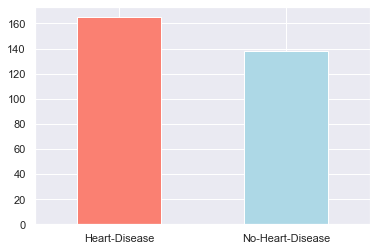

In [7]:
ax = df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
ax.set_xticklabels( ('Heart-Disease','No-Heart-Disease'), rotation='horizontal');

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart-Disease Frequeancy according to Sex

In [11]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


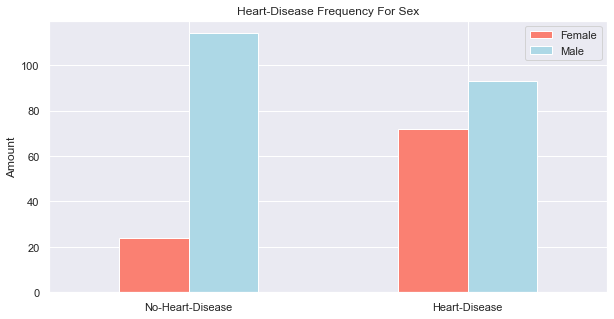

In [13]:
ax2 = pd.crosstab(df['target'],df['sex']).plot(kind = 'bar',
                                         color = ['salmon', 'lightblue'],
                                         figsize = (10,5));
ax2.set_xticklabels( ('No-Heart-Disease','Heart-Disease'), rotation='horizontal')
plt.title('Heart-Disease Frequency For Sex')
plt.xlabel('')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);


### Age vs Max Heart Rate fro Heart Disease

thalach - maximum heart rate achieved

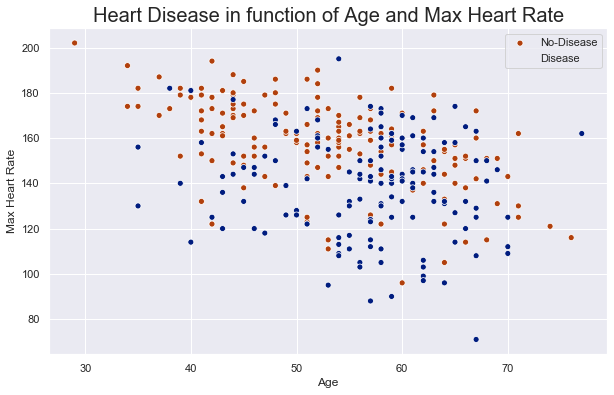

In [14]:
plt.figure(figsize = (10,6))
sns.scatterplot(df['age'],df['thalach'],hue=df['target'],palette='dark')

plt.title('Heart Disease in function of Age and Max Heart Rate',fontsize=20)
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(["No-Disease","Disease"]);

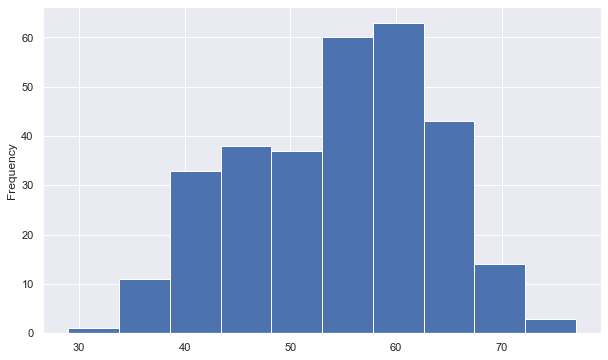

In [15]:
# Check the distribution of Age column with a histogram
plt.figure(figsize=(10,6))
df.age.plot.hist();

### Heart Disease Frequency Per Chest Pain type

3. cp - chest pain type
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
    * 4: asymptomatic

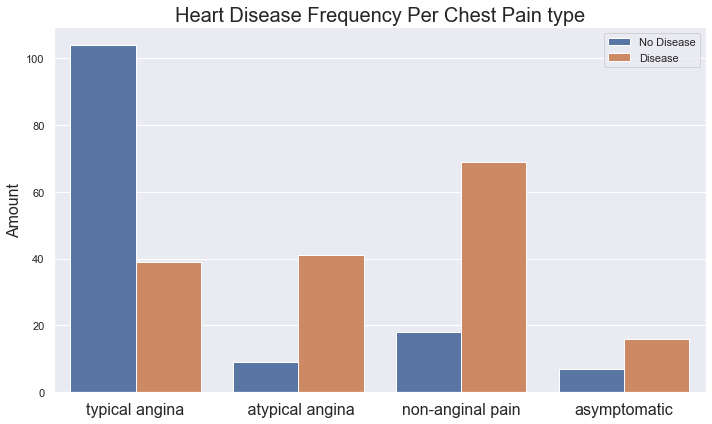

In [16]:
plt.figure(figsize=(10,6))
ax4 = sns.countplot(df['cp'],hue=df['target'])
ax4.set_xticklabels(['typical angina',' atypical angina','non-anginal pain','asymptomatic'],fontsize=16)
plt.title('Heart Disease Frequency Per Chest Pain type',fontsize=20)
plt.xlabel('')
plt.ylabel('Amount',fontsize=16)
plt.legend(['No Disease','Disease'])
plt.tight_layout();

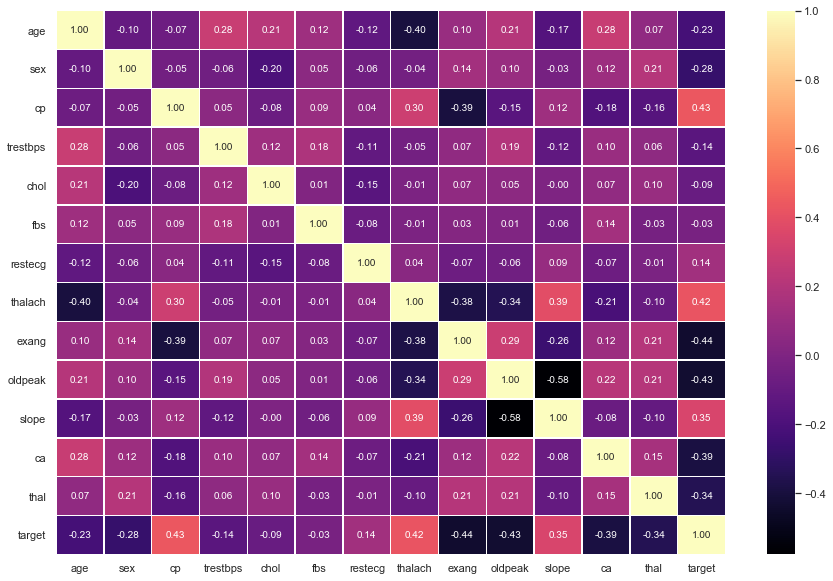

In [17]:
# Make a correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 fmt ='.2f',
                 linewidths=0.5,
                 cmap = 'magma');

 ### cmap Possible values are:
        Accent, Accent_r,Blues,Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r,
        CMRmap, CMRmap_r,Dark2,Dark2_r,GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r,
        OrRd, OrRd_r, Oranges, Oranges_r,PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r,
        Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu,PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r,
        RdBu, RdBu_r, RdGy,RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r,
        Set1, Set1_r, Set2, Set2_r,Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r,
        YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r,YlOrRd, YlOrRd_r,afmhot, afmhot_r, autumn, autumn_r,
        binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,cividis, cividis_r, cool, cool_r,
        coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r,flag, flag_r,
        gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
        gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, 
        gray_r,hot, hot_r, hsv, hsv_r,icefire, icefire_r, inferno, inferno_r,jet, jet_r, magma, magma_r, mako, mako_r,
        nipy_spectral, nipy_spectral_r, ocean, ocean_r,pink, pink_r, plasma, plasma_r, prism, prism_r,
        rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r,spring, spring_r, summer, summer_r,
        tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, 
        terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter,
        winter_r

## 5.Modelling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Split data into X and y
X = df.drop('target',axis=1)
y = df['target']

# set random seed
np.random.seed(42)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

Now we've got our data split into training and test sets, its time to build a machine learnind model

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set

We're going to try 3 different machine learning models:
* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [20]:
# Puts model in dictionary
models = {'Logistic Regression':LogisticRegression(),
           'K-Nearest Neighbours CLassifier':KNeighborsClassifier(),
           'Random Forest CLassifier':RandomForestClassifier()}
    
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different sklearn machine learning models
    X_train: training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seeds
    np.random.seed(42)
    # Make a dictionary to keep the model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to data
        model.fit(X_train,y_train)
        # Evalute the model and append its score to model scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores   

In [21]:
model_scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores

C:\Users\JARVIS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours CLassifier': 0.6885245901639344,
 'Random Forest CLassifier': 0.8360655737704918}

 ### Model Comparision

In [22]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,K-Nearest Neighbours CLassifier,Random Forest CLassifier
accuracy,0.885246,0.688525,0.836066


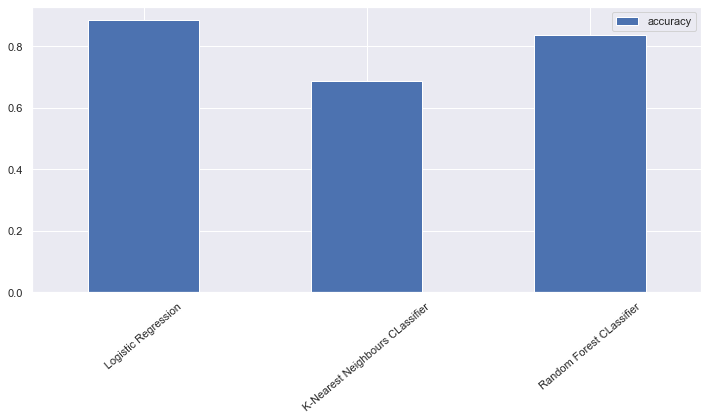

In [23]:
sns.set(font_scale=1)
model_compare.T.plot.bar(figsize=(10,6))
plt.xticks(rotation=40);
plt.tight_layout()

Now we've got our baseline model..and we know a model's first predictions aren't always what we should based our next steps off.

What should we do?

Lets look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision 
* Recall
* F1 score
* Classification Report 
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter Tuning

In [24]:
# Let's tune KNN
 
train_scores = []
test_scores = []

# Create a list different values for n neighbors
neighbors = range(1,21)

# Setup KNN instances
knn = KNeighborsClassifier()

# Loop through different neighbors
for i in neighbors:
        knn.set_params(n_neighbors=i)
        
        # Fit the algorithm
        knn.fit(X_train,y_train)
        
        # Update training score list
        train_scores.append(knn.score(X_train,y_train))
        
        # Update testing score list
        test_scores.append(knn.score(X_test,y_test))

Maximum KNN score on test data : 75.41%


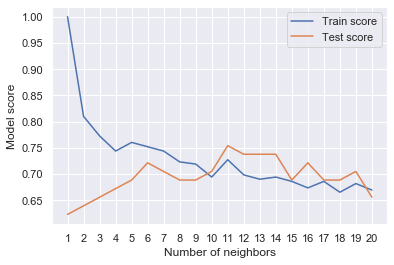

In [25]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')

plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on test data : {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune: 
* Logistic Regression()
* Random Forest Classifier()
....using RandomizedSearchCV

In [26]:
# Create a hyperparameter grid for Logistic Regression 
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

Now we've got hyperparmeter grids setup for each of our models,
Lets tune them using RandomizedSearchCV...

In [27]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv = 5,
                                n_iter=20,
                                verbose= True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), lets do the same for RandomForestClassifier()

In [30]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv = 5,
                           n_iter= 20,
                           verbose= True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [31]:
# Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [33]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours CLassifier': 0.6885245901639344,
 'Random Forest CLassifier': 0.8360655737704918}

## Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV... 

In [34]:
# Different hyperparameter for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

# setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv = 5,
                          verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [35]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [37]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours CLassifier': 0.6885245901639344,
 'Random Forest CLassifier': 0.8360655737704918}

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

...and it would be great if cross-validation was used where possible

In [38]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

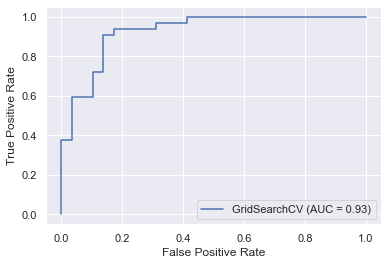

In [39]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

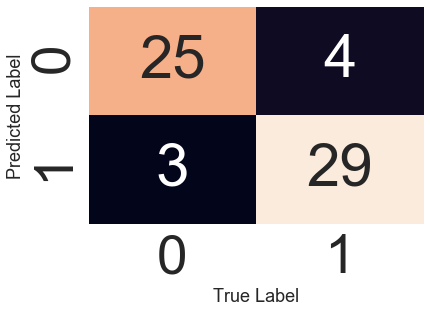

In [40]:
# Confusion matrix
sns.set(font_scale=5)
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
plt.xlabel('True Label',fontsize=18)
plt.ylabel('Predicted Label',fontsize=18);

Now we've got ROC curve, AUC metric and confusion matrix. Lets get a classification report as well as cross validated precision, recall and F1 score.

In [41]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1 score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [42]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                         solver ='liblinear')

In [45]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [46]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv = 5,
                               scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [47]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv = 5,
                               scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [48]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

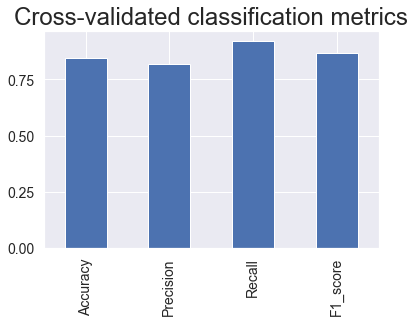

In [58]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1_score': cv_f1},
                          index=[0])
sns.set(font_scale=2)
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend = False,
                      fontsize=14);

### Features importance

Feature importance is another as asking, 'which features contributed most to the outcomes of the model and how did they contribute?'

Let's find the feature importance for our LogisticRegression model...

In [61]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C= 0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train,y_train);

In [62]:
# Check coeff
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [63]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

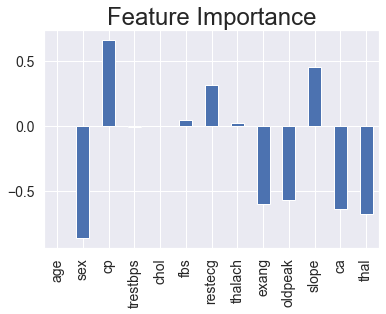

In [66]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = 'Feature Importance',
                      legend = False,
                      fontsize = 14);